## i. Introduction

By: George Kenji Putra

From: HCK-005

Dataset: **Credit Card Information**

Objective: To run the model inference from Customer Segmentation -ML.ipynb file.

## ii. Importing Libraries

In [1]:
# importing libraries to be used

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## iii. Data Loading

We are going to load the sample data and also all the models needed to run our model inference.

In [2]:
# loading and assigning the dataset as inference

inference = pd.read_csv('Customer Segmentation Inference - ML.csv')

inference

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5039,464.674156,0.888889,1979.22,1979.22,0.00,1981.265503,0.666667,0.666667,0.000000,0.111111,1,11,3000.0,3110.052742,132.446091,0.200000,9
1,5311,133.687510,1.000000,1139.20,0.00,1139.20,0.000000,1.000000,0.000000,0.875000,0.000000,0,15,3000.0,957.152839,116.355394,0.833333,8
2,4221,1295.446588,1.000000,886.37,886.37,0.00,1310.182842,0.333333,0.333333,0.000000,0.416667,8,7,1800.0,2966.291948,493.349977,0.000000,12
3,303,228.909884,1.000000,2617.85,2426.43,191.42,0.000000,1.000000,0.916667,0.416667,0.000000,0,35,1800.0,1774.318305,143.208454,0.700000,12
4,8379,1107.099917,1.000000,473.64,0.00,473.64,956.509038,1.000000,0.000000,0.916667,0.083333,1,12,1200.0,501.511019,556.905288,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7109,1358.798385,1.000000,0.00,0.00,0.00,174.369769,0.000000,0.000000,0.000000,0.166667,2,0,1500.0,337.074078,294.178618,0.000000,12
396,3539,1004.441314,1.000000,530.32,38.00,492.32,0.000000,0.833333,0.083333,0.750000,0.000000,0,14,1000.0,737.914629,1040.035593,0.000000,12
397,743,1839.926709,1.000000,487.75,0.00,487.75,266.614527,0.500000,0.000000,0.416667,0.083333,1,9,3500.0,791.115227,385.482464,0.000000,12
398,6059,2646.022772,1.000000,1541.13,487.00,1054.13,1234.504809,0.916667,0.250000,0.833333,0.333333,6,17,4000.0,600.203047,575.913224,0.000000,12


In [3]:
# load the models

preprocess = pickle.load(open('preprocess.pkl', 'rb'))
km_model = pickle.load(open('km_pred.pkl', 'rb'))


## xi. Model Inference

We will run the actual test in this session using the saved data from h8dsft_P1G2_George_Kenji_Putra.ipynb file.

### xi.i Inference Preprocessing

In [4]:
# doing preprocessing to the raw data

inf_final = preprocess.fit_transform(inference)

In [5]:
# convert to dataframe

inf_final = pd.DataFrame(inf_final, columns=['PCA_' + str(i) for i in range(1, 8)])

inf_final

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.336961,1.055383,2.238896,1.876968,1.189090,-1.132073,2.249579
1,-2.749744,-1.049771,-1.947764,0.577213,-0.757427,-0.693871,2.249579
2,1.739875,2.392937,1.381125,0.158916,1.448979,-1.060503,-0.444528
3,-3.575223,0.568942,0.862311,0.245091,0.374666,-1.731595,-0.444528
4,-0.097858,0.690288,-2.648203,-0.959566,1.218280,0.178124,-0.444528
...,...,...,...,...,...,...,...
395,3.435778,-0.906092,-0.383644,-0.939528,0.063116,-0.523996,-0.444528
396,-1.665372,0.611302,-1.105019,-2.163680,0.167045,-0.233452,-0.444528
397,0.477314,0.806561,-1.784667,-0.375073,0.032618,0.691974,-0.444528
398,-0.303061,3.064215,-0.817248,-0.081653,1.941091,0.718034,-0.444528


### xi.ii Inference Prediction

In [6]:
# predicting the model

result_km = km_model.predict(inf_final)

result_km

array([2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1,
       1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0,
       1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0,
       0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2,

In [7]:
# adding the predict result to the inf_final (principal component)

inf_final['Cluster'] = list(result_km)
inf_final.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,Cluster
0,-0.336961,1.055383,2.238896,1.876968,1.189090,-1.132073,2.249579,2
1,-2.749744,-1.049771,-1.947764,0.577213,-0.757427,-0.693871,2.249579,1
2,1.739875,2.392937,1.381125,0.158916,1.448979,-1.060503,-0.444528,2
3,-3.575223,0.568942,0.862311,0.245091,0.374666,-1.731595,-0.444528,1
4,-0.097858,0.690288,-2.648203,-0.959566,1.218280,0.178124,-0.444528,2


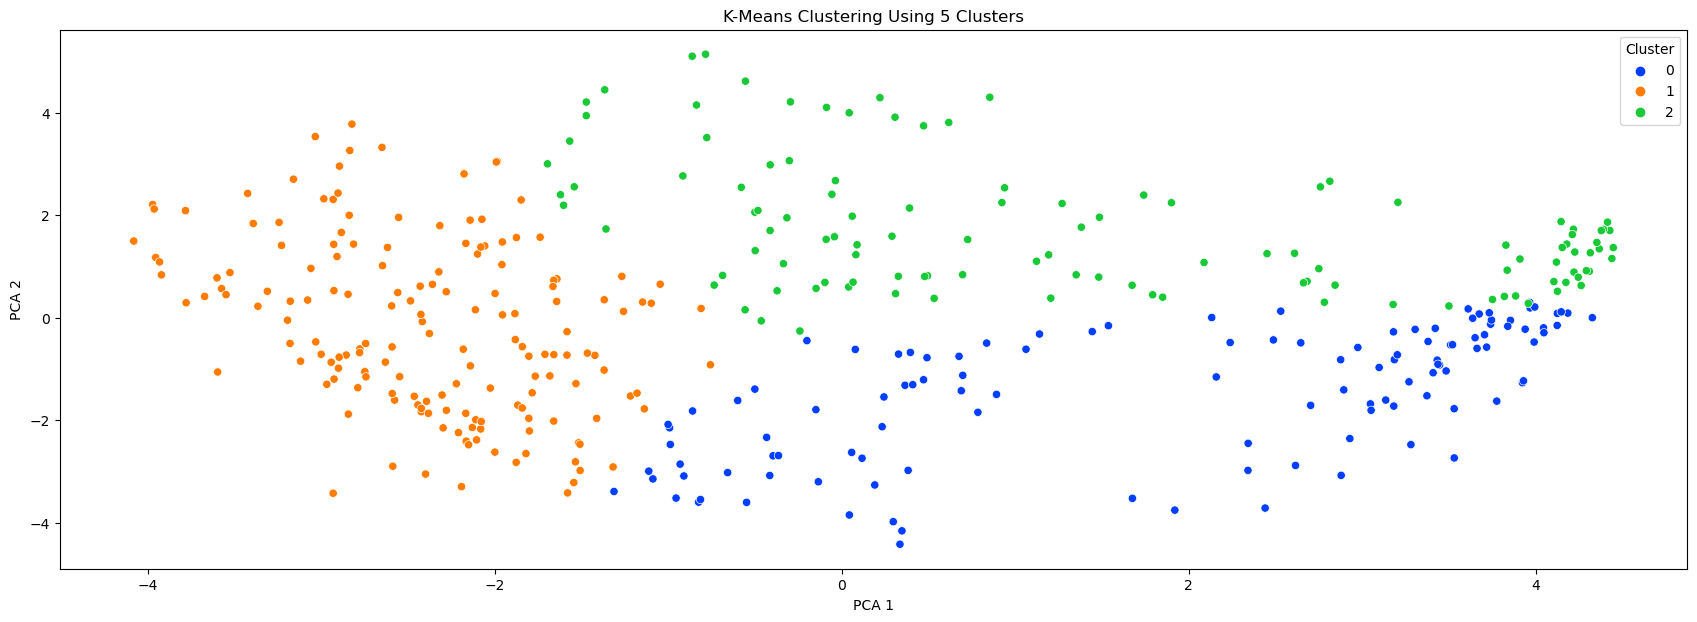

In [8]:
# showing the clustering predictions

plt.figure(figsize=(21, 7))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=inf_final, palette='bright')
plt.title('K-Means Clustering Using 5 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [9]:
# adding the predict result to the inference (original data)

inference['Cluster'] = list(result_km)
inference.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,5039,464.674156,0.888889,1979.22,1979.22,0.00,1981.265503,0.666667,0.666667,0.000000,0.111111,1,11,3000.0,3110.052742,132.446091,0.200000,9,2
1,5311,133.687510,1.000000,1139.20,0.00,1139.20,0.000000,1.000000,0.000000,0.875000,0.000000,0,15,3000.0,957.152839,116.355394,0.833333,8,1
2,4221,1295.446588,1.000000,886.37,886.37,0.00,1310.182842,0.333333,0.333333,0.000000,0.416667,8,7,1800.0,2966.291948,493.349977,0.000000,12,2
3,303,228.909884,1.000000,2617.85,2426.43,191.42,0.000000,1.000000,0.916667,0.416667,0.000000,0,35,1800.0,1774.318305,143.208454,0.700000,12,1
4,8379,1107.099917,1.000000,473.64,0.00,473.64,956.509038,1.000000,0.000000,0.916667,0.083333,1,12,1200.0,501.511019,556.905288,0.000000,12,2


In [10]:
# grouping by cluster in order to get some insight

inference.groupby('Cluster').mean()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,,
0,4207.525424,715.299677,0.732412,106.904322,78.757119,28.147203,680.940694,0.089576,0.047156,0.037712,0.138314,2.805085,1.372881,2910.734463,791.868896,393.877340,0.097049,11.406780
1,4426.187879,637.451282,0.891443,1896.900727,1106.603939,790.296788,11.689469,0.850620,0.292559,0.685692,0.005724,0.072727,25.496970,4519.393939,1794.868573,591.662756,0.337485,11.606061
2,4417.136752,2864.193612,0.969456,1086.395556,757.586154,329.106154,2036.525617,0.426675,0.237790,0.262537,0.293157,7.136752,14.290598,5426.923077,2578.268217,1431.325744,0.029525,11.350427


In summary:

* Cluster 0 represents affluent and frequent buyers who make substantial purchases. 
* Cluster 1 consists of customers who spend less and rely heavily on cash advances. 
* Cluster 2 comprises moderate spenders who maintain a balanced approach to their purchases.